In [1]:
"""Optimizing threshold for private multiplicative weights
Author: Albert Sun 7/13/2021"""
from src.hdmm import workload, fairtemplates, error, fairmechanism, matrix, mechanism, templates
from implementations import pmw, pmw_optimized
import numpy as np

## Intialize Workloads


In [2]:
W_identity = workload.Identity(8).dense_matrix()
W_allrange = workload.AllRange(8).dense_matrix()
W_total = workload.Total(8).dense_matrix()

W_five_identity = np.vstack((W_identity, W_identity, W_identity, W_identity, W_identity))
W_sd = np.vstack((W_identity, W_allrange))
W_ds = np.vstack((W_allrange, W_identity))
W_sds = np.vstack((W_identity, W_allrange, W_identity))
W_dsd = np.vstack((W_allrange, W_identity, W_allrange))
W_random = np.random.permutation(W_sd)

## Initialize Databases


In [3]:
x_flat = np.array([1000, 1210, 1300, 1250, 1500, 1450, 1700, 1720])
x_peaks = np.array([1000, 8000, 1300, 1250, 9000, 1450, 1700, 1720])

## Implementations

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 3150.555288721226
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 343.27637564228326
1 [0. 1. 0. 0. 0. 0. 0. 0.] -165.9310628598446
2 [0. 0. 1. 0. 0. 0. 0. 0.] 23.406485970264825
3 [0. 0. 0. 1. 0. 0. 0. 0.] 229.32364031348843
4 [0. 0. 0. 0. 1. 0. 0. 0.] -83.22925193767243
5 [0. 0. 0. 0. 0. 1. 0. 0.] -92.01871291816452
6 [0. 0. 0. 0. 0. 0. 1. 0.] 221.67538513205076
7 [0. 0. 0. 0. 0. 0. 0. 1.] 244.97902242898223
8 [1. 0. 0. 0. 0. 0. 0. 0.] 460.64270273791556
9 [0. 1. 0. 0. 0. 0. 0. 0.] 8.457208616104243
10 [0. 0. 1. 0. 0. 0. 0. 0.] 0.8729174674918211
11 [0. 0. 0. 1. 0. 0. 0. 0.] 23.053236624327173
12 [0. 0. 0. 0. 1. 0. 0. 0.] -347.91067538274
13 [0. 0. 0. 0. 0. 1. 0. 0.] 48.370732605053604
14 [0. 0. 0. 0. 0. 0. 1. 0.] 5.260849071974302
15 [0. 0. 0. 0. 0. 0. 0. 1.] 401.68245427560277
16 [1. 0. 0. 0. 0. 0. 0. 0.] 79.38077725707616
17 [0. 1. 0. 0. 0. 0. 0. 0.] -198.98227870064306
18 [0. 0. 1. 0. 0. 0. 0. 0.

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

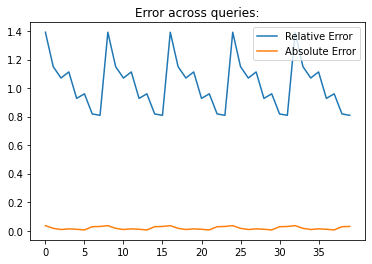

In [4]:
pmw(W_five_identity, x_flat)

original database: [1000 8000 1300 1250 9000 1450 1700 1720]
T (Threshold) = 2249.1248382364483
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 91.0877583299486
1 [0. 1. 0. 0. 0. 0. 0. 0.] -57.65067952923096
2 [0. 0. 1. 0. 0. 0. 0. 0.] -64.28874180215155
3 [0. 0. 0. 1. 0. 0. 0. 0.] 286.32864152571216
4 [0. 0. 0. 0. 1. 0. 0. 0.] 148.6532319303865
5 [0. 0. 0. 0. 0. 1. 0. 0.] 212.27851945987126
6 [0. 0. 0. 0. 0. 0. 1. 0.] 55.34128398374344
7 [0. 0. 0. 0. 0. 0. 0. 1.] -449.45325046515165
8 [1. 0. 0. 0. 0. 0. 0. 0.] 51.34702733219837
9 [0. 1. 0. 0. 0. 0. 0. 0.] 49.82138283030357
10 [0. 0. 1. 0. 0. 0. 0. 0.] -14.85662016369166
11 [0. 0. 0. 1. 0. 0. 0. 0.] -49.23054889709131
12 [0. 0. 0. 0. 1. 0. 0. 0.] 83.21098314140208
13 [0. 0. 0. 0. 0. 1. 0. 0.] 31.0607285702763
14 [0. 0. 0. 0. 0. 0. 1. 0.] -85.1792994964706
15 [0. 0. 0. 0. 0. 0. 0. 1.] 32.823812294816435
16 [1. 0. 0. 0. 0. 0. 0. 0.] 146.16666687107931
17 [0. 1. 0. 0. 0. 0. 0. 0.] -108.69585839146283
18 [0. 0. 1. 0. 0. 0. 0. 0.] -

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

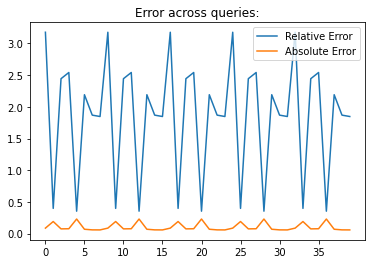

In [5]:
pmw(W_five_identity, x_peaks)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 3200.67325048008
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 4.083846303914256
1 [0. 1. 0. 0. 0. 0. 0. 0.] -312.7903522276601
2 [0. 0. 1. 0. 0. 0. 0. 0.] -109.12627388548394
3 [0. 0. 0. 1. 0. 0. 0. 0.] 16.715908067416418
4 [0. 0. 0. 0. 1. 0. 0. 0.] 0.0874426394946474
5 [0. 0. 0. 0. 0. 1. 0. 0.] 367.85567164747636
6 [0. 0. 0. 0. 0. 0. 1. 0.] -456.926663820555
7 [0. 0. 0. 0. 0. 0. 0. 1.] -12.035037606111525
8 [1. 0. 0. 0. 0. 0. 0. 0.] -101.57006073587763
9 [1. 1. 0. 0. 0. 0. 0. 0.] 274.26385414585354
10 [1. 1. 1. 0. 0. 0. 0. 0.] -80.0337008208503
11 [1. 1. 1. 1. 0. 0. 0. 0.] -21.771170507945417
12 [1. 1. 1. 1. 1. 0. 0. 0.] -312.0912770959033
13 [1. 1. 1. 1. 1. 1. 0. 0.] 283.074839328828
14 [1. 1. 1. 1. 1. 1. 1. 0.] -72.85261904825282
15 [1. 1. 1. 1. 1. 1. 1. 1.] 50.76376898584895
16 [0. 1. 0. 0. 0. 0. 0. 0.] 84.86927434379295
17 [0. 1. 1. 0. 0. 0. 0. 0.] 14.520211941726545
18 [0. 1. 1. 1. 0. 0. 0. 0.

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 1.0,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.125,
 0.25,
 0.375,
 0.5,
 0.125,
 0.25,
 0.375,
 0.125,
 0.25,
 0.125]

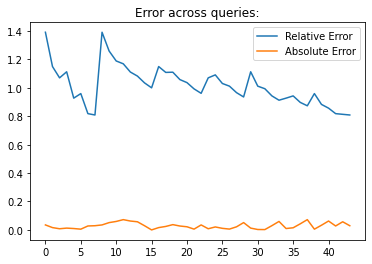

In [6]:
pmw(W_sd, x_flat)

original database: [1000 8000 1300 1250 9000 1450 1700 1720]
T (Threshold) = 2284.9031510428154
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 73.86642564186593
1 [0. 1. 0. 0. 0. 0. 0. 0.] 29.738749571985572
2 [0. 0. 1. 0. 0. 0. 0. 0.] -250.77941149718072
3 [0. 0. 0. 1. 0. 0. 0. 0.] 37.405524468386034
4 [0. 0. 0. 0. 1. 0. 0. 0.] -47.571792667598395
5 [0. 0. 0. 0. 0. 1. 0. 0.] -66.43877826704968
6 [0. 0. 0. 0. 0. 0. 1. 0.] 51.539251058668235
7 [0. 0. 0. 0. 0. 0. 0. 1.] -435.0930045292874
8 [1. 0. 0. 0. 0. 0. 0. 0.] -44.98676966624651
9 [1. 1. 0. 0. 0. 0. 0. 0.] -20.526232500084934
10 [1. 1. 1. 0. 0. 0. 0. 0.] -36.99370190502605
11 [1. 1. 1. 1. 0. 0. 0. 0.] 43.612446491886985
12 [1. 1. 1. 1. 1. 0. 0. 0.] -1.102768874299675
13 [1. 1. 1. 1. 1. 1. 0. 0.] 55.10601732518413
14 [1. 1. 1. 1. 1. 1. 1. 0.] 26.938627226260962
15 [1. 1. 1. 1. 1. 1. 1. 1.] -2.970312804406553
16 [0. 1. 0. 0. 0. 0. 0. 0.] -99.29542638885664
17 [0. 1. 1. 0. 0. 0. 0. 0.] 59.65238434789193
18 [0. 1. 1. 1. 0. 0. 

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 1.0,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.125,
 0.25,
 0.375,
 0.5,
 0.125,
 0.25,
 0.375,
 0.125,
 0.25,
 0.125]

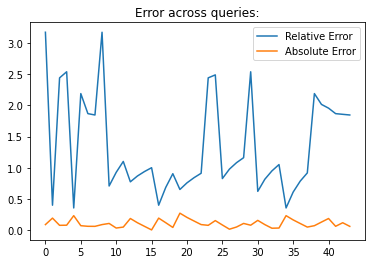

In [7]:
pmw(W_sd, x_peaks)

So far, it is clear that the algorithm updates more when 
- answering dense (all-range) than sparse (identity) workloads,
- flat than uneven dataframes.

The next question we need to think about is what to initialize the threshold and level of laplace noise to add. 

7/16 Questions - what do we initialize laplace_scale and threshold to be? How do I use epsilon and beta for this new instance? Do we want to be changing the d_t_hat threshold or the threshold for the max amount of updates - let's start playing with the query threshold because d_t_hat threshold honestly seems pretty reasonable.

# optimized

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 5000
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] -0.07719847738312727
1 [0. 1. 0. 0. 0. 0. 0. 0.] -0.01872226565444772
2 [0. 0. 1. 0. 0. 0. 0. 0.] 0.0037107884901651234
3 [0. 0. 0. 1. 0. 0. 0. 0.] -0.02442723824486573
4 [0. 0. 0. 0. 1. 0. 0. 0.] 0.0023739169486601264
5 [0. 0. 0. 0. 0. 1. 0. 0.] 0.018526121444630644
6 [0. 0. 0. 0. 0. 0. 1. 0.] 0.015659227924190222
7 [0. 0. 0. 0. 0. 0. 0. 1.] 0.03676835282301849
8 [1. 0. 0. 0. 0. 0. 0. 0.] -0.0507726971494919
9 [0. 1. 0. 0. 0. 0. 0. 0.] -0.01400286853520144
10 [0. 0. 1. 0. 0. 0. 0. 0.] 0.011593583468188895
11 [0. 0. 0. 1. 0. 0. 0. 0.] 0.0023702893644300116
12 [0. 0. 0. 0. 1. 0. 0. 0.] 0.007419342165080917
13 [0. 0. 0. 0. 0. 1. 0. 0.] -0.001974701337158241
14 [0. 0. 0. 0. 0. 0. 1. 0.] 0.040967618125565375
15 [0. 0. 0. 0. 0. 0. 0. 1.] 0.029499280677900863
16 [1. 0. 0. 0. 0. 0. 0. 0.] -0.03611004433935873
17 [0. 1. 0. 0. 0. 0. 0. 0.] -0.0227091049139557

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

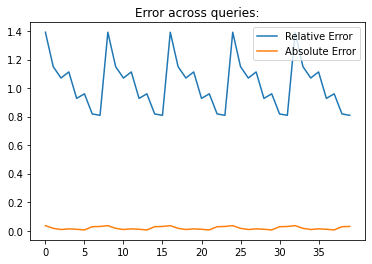

In [8]:
pmw_optimized(W_five_identity, x_flat, laplace_scale=0.01, threshold=5000)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 0.05
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] -0.03585970263257825
1 [0. 1. 0. 0. 0. 0. 0. 0.] -0.010042603768139605
2 [0. 0. 1. 0. 0. 0. 0. 0.] 0.022957791289005325
3 [0. 0. 0. 1. 0. 0. 0. 0.] -0.014213270573022352
4 [0. 0. 0. 0. 1. 0. 0. 0.] 0.03012149710057843
5 [0. 0. 0. 0. 0. 1. 0. 0.] 0.004715945154212808
6 [0. 0. 0. 0. 0. 0. 1. 0.] 0.005542863521357327
7 [0. 0. 0. 0. 0. 0. 0. 1.] 0.05442888353192543
8 [1. 0. 0. 0. 0. 0. 0. 0.] -0.04467792430198432
9 [1. 1. 0. 0. 0. 0. 0. 0.] -0.054590558709420645
10 [1. 1. 1. 0. 0. 0. 0. 0.] -0.06571916528395794
11 [1. 1. 1. 1. 0. 0. 0. 0.] -0.07909497159598311
12 [1. 1. 1. 1. 1. 0. 0. 0.] -0.09095231983711716
13 [1. 1. 1. 1. 1. 1. 0. 0.] -0.06444997169063482
14 [1. 1. 1. 1. 1. 1. 1. 0.] -0.008388573572633673
15 [1. 1. 1. 1. 1. 1. 1. 1.] -0.0033327614264195837
16 [0. 1. 0. 0. 0. 0. 0. 0.] -0.0297557888982721
17 [0. 1. 1. 0. 0. 0. 0. 0.] -0.023632885239774

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 1.6121193488942086e-05,
 0.1251770943207056,
 1.75888256902058e-05,
 2.799610932056162e-05,
 3.820138919675087e-05,
 4.8494032983924084e-05,
 6.213581718900566e-05,
 0.8797458268749376,
 0.9999999999999999,
 0.12875390101456802,
 0.256050565159269,
 0.3819064854434655,
 0.5063379682086122,
 0.6293611352409635,
 0.7509919258603697,
 0.8712460989854319,
 0.12729666414470098,
 0.2531525844288975,
 0.3775840671940442,
 0.5006072342263954,
 0.6222380248458017,
 0.742492197970864,
 0.1258559202841965,
 0.25028740304934316,
 0.37331057008169444,
 5.0362026615350965e-05,
 6.14711292180619e-05,
 0.12317056190847689,
 0.2449470791885509,
 0.3653453296396887,
 5.415188230390816e-05,
 0.12106381653809012,
 0.24075743259544943,
 3.887822639985073e-05,
 0.11882367485844311,
 2.7944205916229088e-05,
 0.11779566248644048]

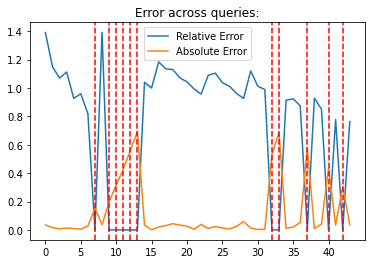

In [95]:
pmw_optimized(W_sd, 
              x=np.array([1000, 1210, 1300, 1250, 1500, 1450, 1700, 1720]), 
              laplace_scale=0.01, 
              threshold=.05)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 0.05
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] -0.03450344525989421
1 [1. 1. 0. 0. 0. 0. 0. 0.] -0.05208541110589476
2 [1. 1. 1. 0. 0. 0. 0. 0.] -0.03793354744135369
3 [1. 1. 1. 1. 0. 0. 0. 0.] -0.06497054626336418
4 [1. 1. 1. 1. 1. 0. 0. 0.] -0.0691741112001224
5 [1. 1. 1. 1. 1. 1. 0. 0.] -0.055826684913323654
6 [1. 1. 1. 1. 1. 1. 1. 0.] -0.035523200681920275
7 [1. 1. 1. 1. 1. 1. 1. 1.] 0.014743066531498705
8 [0. 1. 0. 0. 0. 0. 0. 0.] 0.007714675079371208
9 [0. 1. 1. 0. 0. 0. 0. 0.] -0.040479506948132155
10 [0. 1. 1. 1. 0. 0. 0. 0.] -0.023960802756423816
11 [0. 1. 1. 1. 1. 0. 0. 0.] -0.031027288735045955
12 [0. 1. 1. 1. 1. 1. 0. 0.] -0.05181552874806772
13 [0. 1. 1. 1. 1. 1. 1. 0.] 0.005492663021819055
14 [0. 1. 1. 1. 1. 1. 1. 1.] 0.05241730875108208
15 [0. 0. 1. 0. 0. 0. 0. 0.] -0.012144313277614407
16 [0. 0. 1. 1. 0. 0. 0. 0.] -0.0232945890955506
17 [0. 0. 1. 1. 1. 0. 0. 0.] 0.0205049921081062

[0.125,
 1.778208345858987e-05,
 0.37678357766606374,
 3.9214403941553174e-05,
 5.02273302903073e-05,
 6.272051000556528e-05,
 0.8780058375554178,
 1.0,
 0.12767696275949672,
 0.2539088774381223,
 0.38014079211674784,
 0.5049440137711303,
 5.179866878735591e-05,
 0.7521119096909739,
 8.31673095593612e-05,
 0.1265814643639615,
 0.253162928727923,
 0.3783117438637104,
 0.502044124497716,
 0.6229915483111916,
 7.15141363146978e-05,
 0.12621150369725043,
 0.2509945453817795,
 0.3743652923890679,
 4.908866598905759e-05,
 6.121028290035515e-05,
 0.12351908959676128,
 0.24564018992815306,
 3.856934752264796e-05,
 5.303878606680828e-05,
 0.12052732613667948,
 0.23834183451890678,
 4.006155334290548e-05,
 0.11695612212565526,
 2.7328284296329154e-05,
 1.5948207185745032e-05,
 7.160420888330164e-06,
 0.13288833632549596,
 0.12989729811284528,
 0.12697358190780572,
 0.1227109310420227,
 0.11994896491312468,
 0.11592213861229651,
 0.11724916485885747]

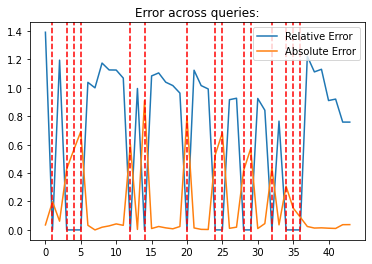

In [91]:
pmw_optimized(W_ds, 
              x=np.array([1000, 1210, 1300, 1250, 1500, 1450, 1700, 1720]), 
              laplace_scale=0.01, 
              threshold=.05)
# no updates generally from 5 - 15, 35 and on

8/11: 

1. What type of larger scale experiments can I run/visualizations can I make to reveal trends of when the dataset updates? 

2. Can we think through a specific, ideal scenario that can help me pin down what threshold numbers are best? 